<a href="https://colab.research.google.com/github/rajputvivek07/Data-Analysis/blob/main/Vivek_Rajput_46_DA_LAB6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OEIT6, Data Analytics 2022 

**Name :** Vivek Rajput

**UID No. :** 2019110046

**Class :** BE ETRX

**Date :** 12/11/2022
# Lab 6: Classification: Text Analysis

---


**Objective:** 
>> Separating Spam From Ham 


---


**Theory:** 
>> Nearly every email user has at some point encountered a "spam" email, which is an unsolicited 
message often advertising a product, containing links to malware, or attempting to scam the 
recipient. Roughly 80-90% of more than 100 billion emails sent each day are spam emails, most 
being sent from botnets of malware-infected computers. The remainder of emails are called 
"ham" emails. 
As a result of the huge number of spam emails being sent across the Internet each day, most 
email providers offer a spam filter that automatically flags likely spam messages and separates 
them from the ham. Though these filters use a number of techniques (e.g. looking up the sender 
in a so-called "Blackhole List" that contains IP addresses of likely spammers), most rely heavily 
on the analysis of the contents of an email via text analytics. 


**The dataset contains just two fields:** 

• text: The text of the email. 

• spam: A binary variable indicating if the email was spam. 


---


**Code and Output::**:





In [1]:
from sklearn.datasets import load_iris 
from sklearn.datasets import make_moons 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn import preprocessing
from sklearn import utils
from matplotlib import pyplot as plt

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns



---

# New Section
*Data preparation *

Data Gather or Data Understand

---
# **Problem 1.1 **

> Loading the Dataset Begin by loading the dataset spam_ham_dataset.csv into a data frame called emails (don't open the file with liboffice; import into python directly to avoid errors). Remember to pass the stringsAsFactors=FALSE option when loading the data.



In [4]:
data = pd.read_csv("spam_ham_dataset.csv")
is_null = pd.isnull(data).sum()
print('The number of empty values by column:')
print(is_null)

The number of empty values by column:
Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64


In [5]:
data.head() # top five rows

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [10]:
data.tail() # bottom five rows

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [11]:
data.describe # Shows the data inside along with max. & min. , mean, deviation

<bound method NDFrame.describe of       Unnamed: 0 label                                               text  \
0            605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1           2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2           3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3           4685  spam  Subject: photoshop , windows , office . cheap ...   
4           2030   ham  Subject: re : indian springs\r\nthis deal is t...   
...          ...   ...                                                ...   
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
0             0  
1    

In [12]:
data.shape # Total no. of rows and columns

(5171, 4)

In [21]:
data['label_num'].value_counts(dropna=False)

0    3672
1    1499
Name: label_num, dtype: int64

In [22]:
len(data['text'].max())

1609

Q.1) How many emails are in the dataset?

> Ans) 5171

Q.2) How many of the emails are spam?

> Ans) 1499

Q.3) How many characters are in the longest email in the dataset (where longest is measured in terms of the maximum number of characters)?

> Ans) 1609

In [13]:
data.isnull().sum() # total number of null values in dataset along with the columns

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [14]:
data.dropna()    # rows containing null values

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0




---

# **Analyze the data**

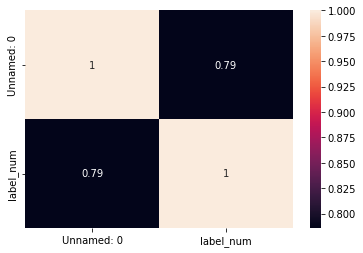

In [15]:
correlation = data.corr()
sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

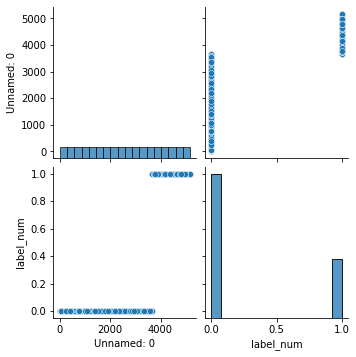

In [16]:
from seaborn.axisgrid import pairplot
pairplot(data)

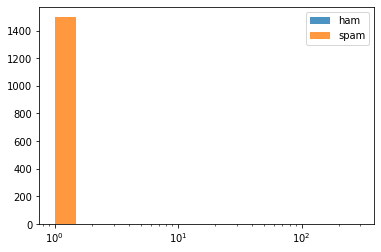

In [6]:
from sklearn.exceptions import DataConversionWarning
data.tail()
data.shape
data.isnull().sum()
data['label'].value_counts()
data['text'].describe()

import matplotlib.pyplot as plt
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(data[data['label']=='ham']['label_num'],bins=bins,alpha=0.8)
plt.hist(data[data['label']=='spam']['label_num'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()


([<matplotlib.patches.Wedge at 0x7fde9efc5ed0>,
 [Text(-1.0580802793655906, 0.3007758674123213, 'Spam'),
  Text(1.1061748227982207, -0.31444754953302667, 'Ham')],
 [Text(-0.5771346978357765, 0.16405956404308433, '13%'),
  Text(0.6252292476685595, -0.17773122364910202, '87%')])

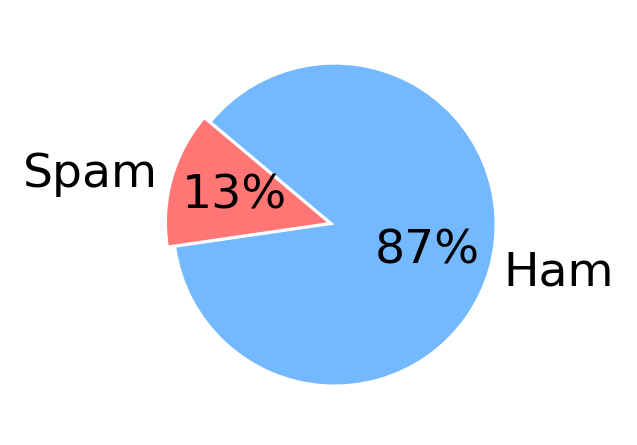

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("spam_ham_dataset.csv")
data.shape
data['label'].value_counts()
labels = ['Spam', 'Ham']
sizes = [747, 4825]
custom_colours = ['#ff7675', '#74b9ff']
plt.figure(figsize=(5, 3), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 15}, startangle=140,
autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])




---



In [ ]:
#Encoder
data.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

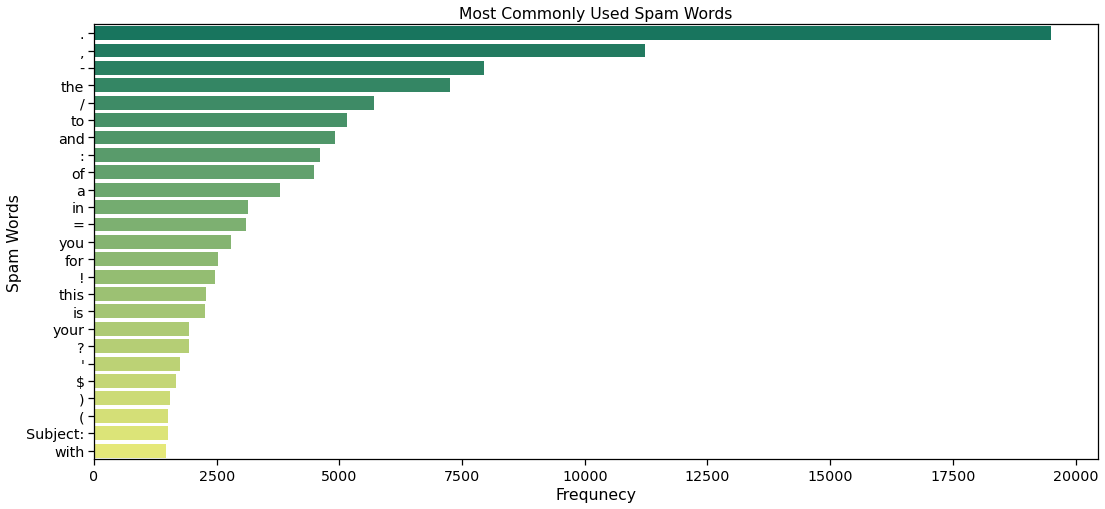

In [ ]:
from collections import Counter
data['label'] = data['label'].replace({'spam':0,'ham':1})
all_spam_words = []
for sentence in data[data['label'] == 0]['text'].to_list():
  for word in sentence.split():
    all_spam_words.append(word)
df = pd.DataFrame(Counter(all_spam_words).most_common(25), columns= ['Word',
'Frequency'])
sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Spam Words")
plt.xlabel("Frequnecy")
plt.ylabel("Spam Words")
plt.show()
all_ham_words = []
for sentence in data[data['label'] == 1]['text'].to_list():
  for word in sentence.split():
    all_ham_words.append(word)

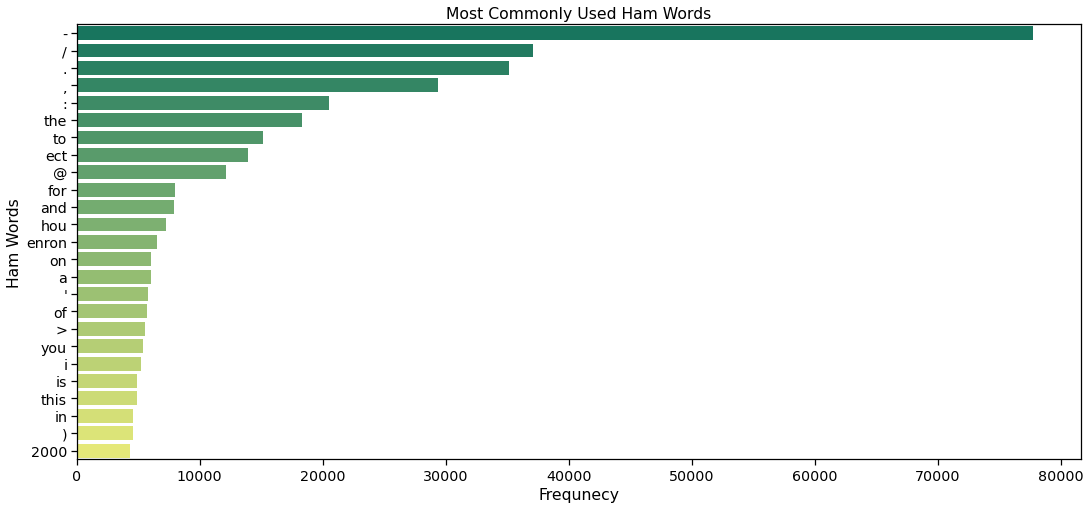

In [20]:
all_ham_words = []
for sentence in data[data['label_num'] == 0]['text'].to_list():
    for word in sentence.split():
        all_ham_words.append(word)

df = pd.DataFrame(Counter(all_ham_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Ham Words")
plt.xlabel("Frequnecy")
plt.ylabel("Ham Words")
plt.show()

The above plot shows the most commonly occuring words in a ham data. The words 'enron' and 'hou' also occur with a frequency of 10,000 and ect also occur with a frequency of 15,000.

Could a spam classifier potentially benefit from including the frequency of the word that appears in every email?

>> Yes -- the number of times the word appears might help us differentiate spam from ham.

>> No -- the word appears in every email so this variable would not help us differentiate spam from ham.

**Answer: **

>> If the word subject appears only once, in each mail, it wouldn't help us differentiate whereas if the word appears multiple times ,for eg, spam emails might have the word subject occuring more compared to ham emails, this might potentially help us classify spam from ham.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(data[["text"]])
data[["text"]] = enc.transform(data[["text"]])

In [ ]:
Selected_features = ['text']

X = data[Selected_features]
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [ ]:
#NLP preprocessing stuff
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,1209.0,0
1,2349,ham,1985.0,0
2,3624,ham,2774.0,0
3,4685,spam,3158.0,1
4,2030,ham,3613.0,0


In [ ]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=10000)
clf = clf.fit(X_train, y_train)
moonsY_pred = clf.predict(X_test)
log_regr_score1 = clf.score(X_test, y_test)
print('log_regr_score: ',log_regr_score1)
confusion_matrix(y_test, moonsY_pred)

log_regr_score:  0.7192575406032483


array([[930,   0],
       [363,   0]])

In [ ]:
clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train, y_train)
moonsY_pred = clf.predict(X_test)
dec_tree_score1 = clf.score(X_test, y_test)
print('dec_tree_score: ',dec_tree_score1)
confusion_matrix(y_test, moonsY_pred)

dec_tree_score:  0.7927300850734725


array([[830, 100],
       [168, 195]])

In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf = clf.fit(X_train, y_train)
moonsY_pred = clf.predict(X_test)
rand_frst_score1 = clf.score(X_test, y_test)
print('random_forest_score: ',rand_frst_score1)
confusion_matrix(y_test, moonsY_pred)

random_forest_score:  0.7432327919566899


array([[919,  11],
       [321,  42]])

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)
clf = clf.fit(X_train, y_train)
moonsY_pred = clf.predict(X_test)
KNbrs_score1 = clf.score(X_test, y_test)
print('KNbrs_score: ',KNbrs_score1)
confusion_matrix(y_test, moonsY_pred)

KNbrs_score:  0.8267594740912606


array([[824, 106],
       [118, 245]])

In [ ]:
clf = SVC(gamma='auto')
clf = clf.fit(X_train, y_train)
moonsY_pred = clf.predict(X_test)
SVM_score1 = clf.score(X_test, y_test)
print('SVM_score: ',SVM_score1)
confusion_matrix(y_test, moonsY_pred)

SVM_score:  0.794276875483372


array([[911,  19],
       [247, 116]])

In [ ]:
clf = GaussianNB()
clf = clf.fit(X_train, y_train)
moonsY_pred = clf.predict(X_test)
NB_score1 = clf.score(X_test, y_test)
print('NB_score ',NB_score1)
confusion_matrix(y_test, moonsY_pred)

NB_score  0.7192575406032483


array([[930,   0],
       [363,   0]])

In [ ]:
#Vectorization
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("spam_ham_dataset.csv")
x = data.iloc[:, 0].values
y = data.iloc[:, 2].values
regressor = LogisticRegression()


is_null = pd.isnull(data).sum()
print('The number of empty values by column:')
print(is_null)

The number of empty values by column:
Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64


In [ ]:
X = data['text']

Y = data['label']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

X_train_transformed = feature_extraction.fit_transform(X_train)
X_test_transformed = feature_extraction.transform(X_test)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train_transformed, Y_train)

LogisticRegression()

In [ ]:
prediction_on_training_data = model.predict(X_train_transformed)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [ ]:
print('Accuracy on training data : ', accuracy_on_training_data *100)

Accuracy on training data :  99.70986460348162


In [ ]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_transformed)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [ ]:
print('Accuracy on test data : ', accuracy_on_test_data*100)

Accuracy on test data :  98.06763285024155


**Conclusion : **

>> We learned that the Encoder, NLP preprocessing, and Vectorization worked in stepwise.

>> We learned about various features, parameters, functions, Classifiers, Models, Trees etc.

>> As per above result the Accuracy on training data is 99.71 and Accuracy on test data is 98.07 




---


# **Part 2: **

# **Problem 2.1 -Preparing the Corpus**

1. Build a new corpus variable called corpus.

2. Using tm_map, convert the text to lowercase.

3. Using tm_map, remove all punctuation from the corpus.

4. Using tm_map, remove all English stopwords from the corpus.

5. Using tm_map, stem the words in the corpus.

6. Build a document term matrix from the corpus, called dtm.

In [32]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
!pip install scikit-plot
import re
import string
from wordcloud import WordCloud
from collections import Counter

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


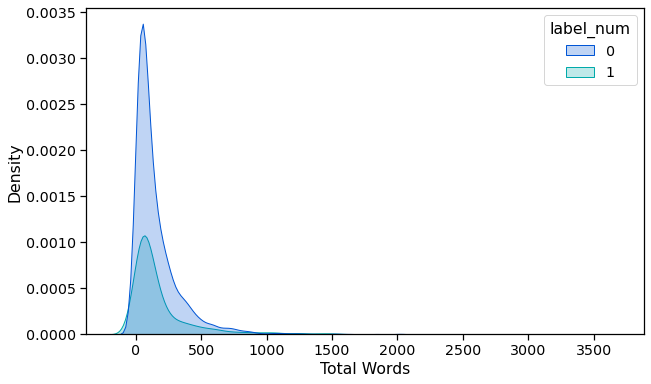

In [33]:
data['Total Words'] = data['text'].apply(lambda x: len(x.split()))
plt.figure(figsize = (10, 6))
sns.kdeplot(x = data['Total Words'], hue= data['label_num'], palette= 'winter', shade = True)
plt.show()

In [34]:
print("Spam categories",data[data['label_num']==1].shape)
print("Ham Categories",data[data['label_num']==0].shape)

Spam categories (1499, 5)
Ham Categories (3672, 5)


In [36]:
# Preprocessing Text
# 1.Converting Data to lowercase
# 2.Removing any noise like ulrs, punctuations
# 3.Removing Stopwords
# 4.Stemming and Lemmatization
def convert_lowercase(text):
    text = text.lower()
    return text

data['text'] = data['text'].apply(convert_lowercase)

def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)

data['text'] = data['text'].apply(remove_url)

exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

data['text'] = data['text'].apply(remove_punc)

def remove_stopwords(text):
    new_list = []
    words = word_tokenize(text)
    stopwrds = stopwords.words('english')
    for word in words:
        if word not in stopwrds:
            new_list.append(word)
    return ' '.join(new_list)

data['text'] = data['text'].apply(remove_stopwords)

def perform_stemming(text):
    stemmer = PorterStemmer()
    new_list = []
    words = word_tokenize(text)
    for word in words:
        new_list.append(stemmer.stem(word))

    return " ".join(new_list)

data['text'] = data['text'].apply(perform_stemming)

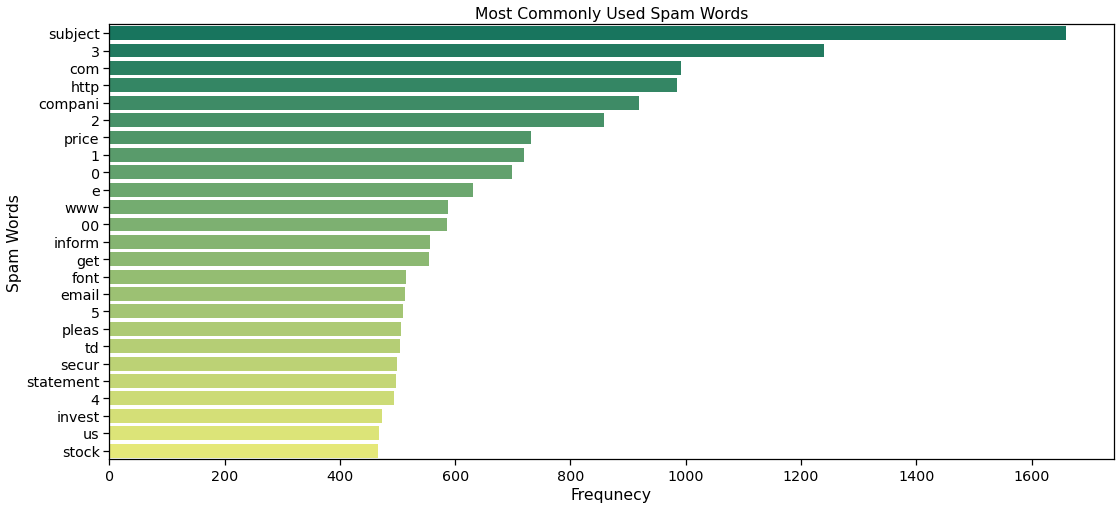

In [37]:
def count_total_words(text):
    char = 0
    for word in text.split():
        char += len(word)
    return char
data['Total Chars'] = data["text"].apply(count_total_words)
data.head()
all_spam_words = []
for sentence in data[data['label_num'] == 1]['text'].to_list():
    for word in sentence.split():
        all_spam_words.append(word)
df = pd.DataFrame(Counter(all_spam_words).most_common(25), columns= ['Word','Frequency'])
sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Spam Words")
plt.xlabel("Frequnecy")
plt.ylabel("Spam Words")
plt.show()

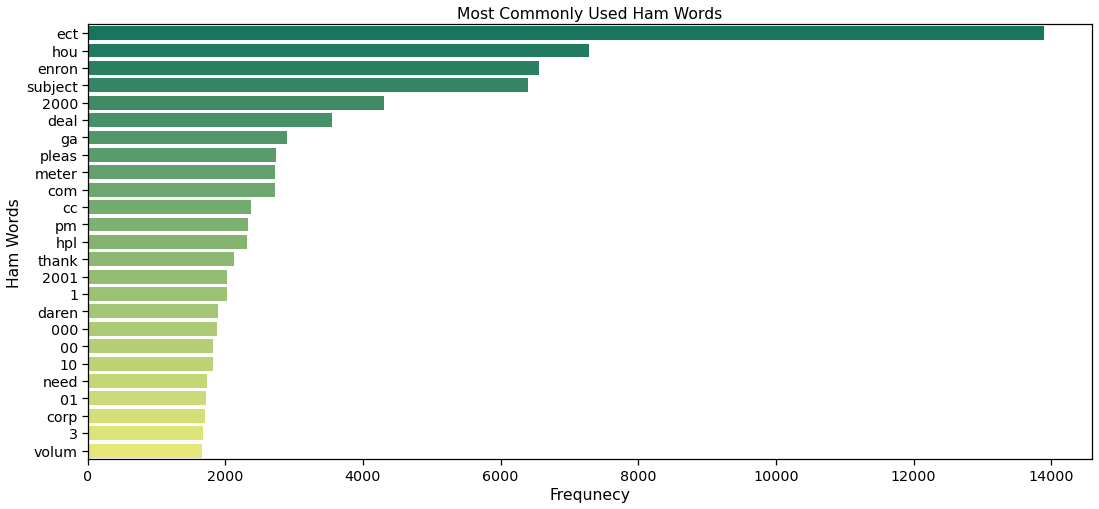

In [38]:
all_ham_words = []
for sentence in data[data['label_num'] == 0]['text'].to_list():
    for word in sentence.split():
        all_ham_words.append(word)
df = pd.DataFrame(Counter(all_ham_words).most_common(25), columns= ['Word','Frequency'])
sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Ham Words")
plt.xlabel("Frequnecy")
plt.ylabel("Ham Words")
plt.show()

In [40]:
# Creating Test and Train data

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label_num'],random_state=1)

cv = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b',lowercase=True, stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)
word_freq_df = pd.DataFrame(X_train_cv.toarray(), columns=cv.get_feature_names())
top_words_df = pd.DataFrame(word_freq_df.sum()).sort_values(0, ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)




---


# ** Different Classifiers model training **

 **Naive Bayes**

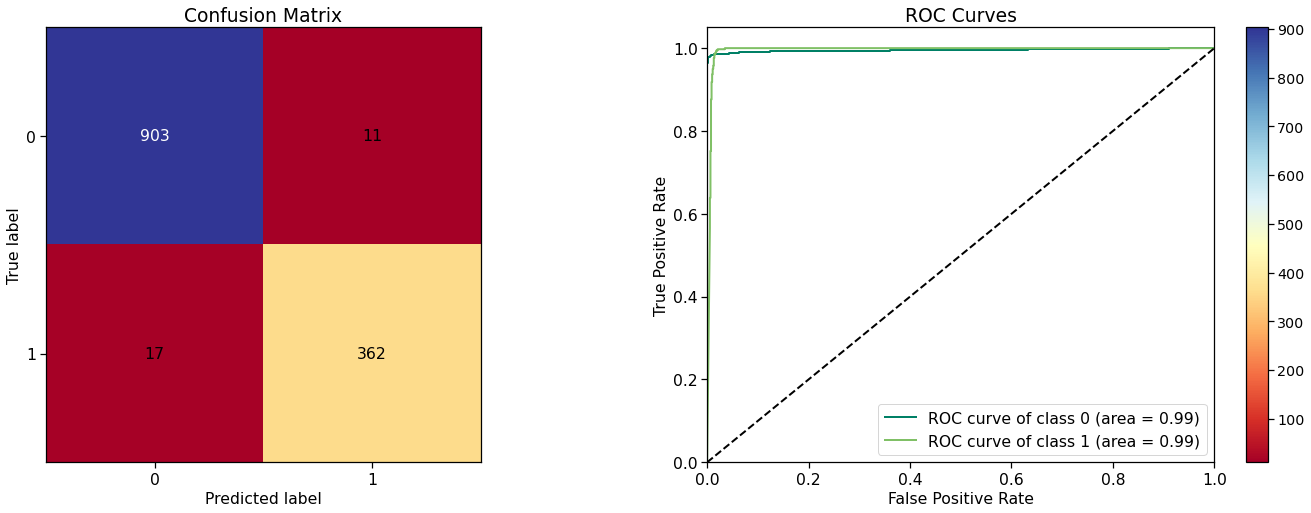

In [42]:
from sklearn.naive_bayes import MultinomialNB
spamNB = MultinomialNB()
spamNB.fit(X_train_cv, y_train)
 
# performing predictions on the test dataset
y_pred = spamNB.predict(X_test_cv)
y_prob = spamNB.predict_proba(X_test_cv)
from scikitplot.metrics import plot_confusion_matrix, plot_roc
fig, ax = plt.subplots(1, 2, figsize = (25,  8))
ax1 = plot_confusion_matrix(y_test, y_pred, ax= ax[0], cmap= 'RdYlBu')
ax2 = plot_roc(y_test, y_prob, ax= ax[1], plot_macro= False, plot_micro= False, cmap= 'summer')

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred))
print('Recall score: ', recall_score(y_test,y_pred))
print("F1 score: ",f1_score(y_test, y_pred))

Accuracy score:  0.9783449342614076
Precision score:  0.9705093833780161
Recall score:  0.9551451187335093
F1 score:  0.9627659574468085


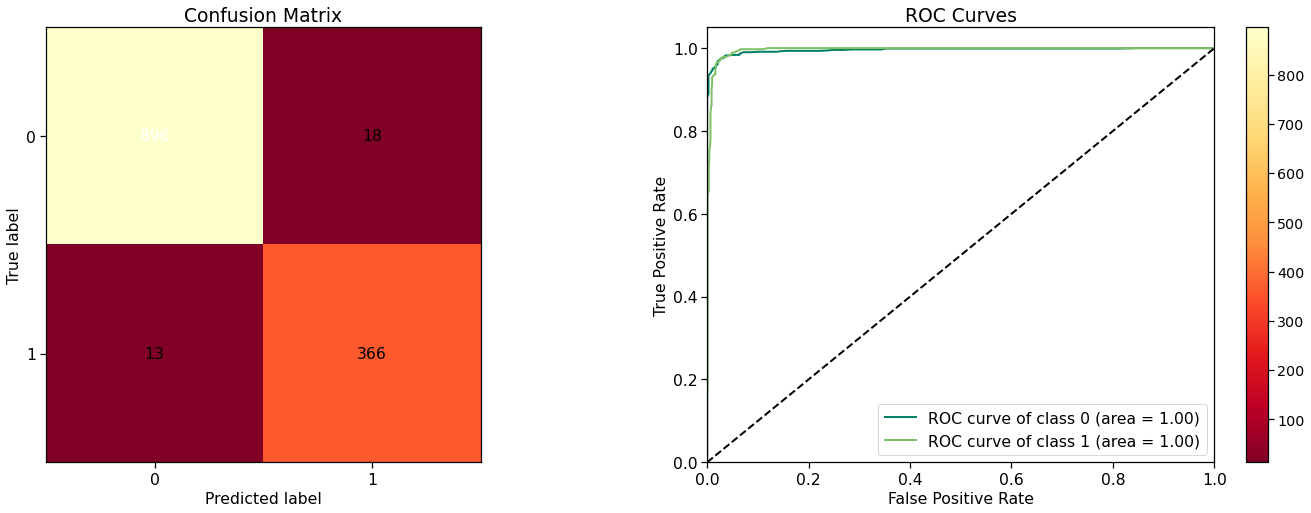

In [49]:
from sklearn.ensemble import RandomForestClassifier
spamRF = RandomForestClassifier(n_estimators = 100) 
spamRF.fit(X_train_cv, y_train)
 
# performing predictions on the test dataset
y_pred = spamRF.predict(X_test_cv)
y_prob = spamRF.predict_proba(X_test_cv)
from scikitplot.metrics import plot_confusion_matrix, plot_roc
fig, ax = plt.subplots(1, 2, figsize = (25,  8))
ax1 = plot_confusion_matrix(y_test, y_pred, ax= ax[0], cmap= 'YlOrRd_r')
ax2 = plot_roc(y_test, y_prob, ax= ax[1], plot_macro= False, plot_micro= False, cmap= 'summer')

What is the training set accuracy of spamRF, using a threshold of 0.5 for predictions? (Remember that your answer might not match ours exactly, due to random behavior in the random forest algorithm on different operating systems.)

>> The accuracy is 100% for Random Forest

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred))
print('Recall score: ', recall_score(y_test,y_pred))
print("F1 score: ",f1_score(y_test, y_pred))

Accuracy score:  0.9760247486465584
Precision score:  0.953125
Recall score:  0.9656992084432717
F1 score:  0.9593709043250327


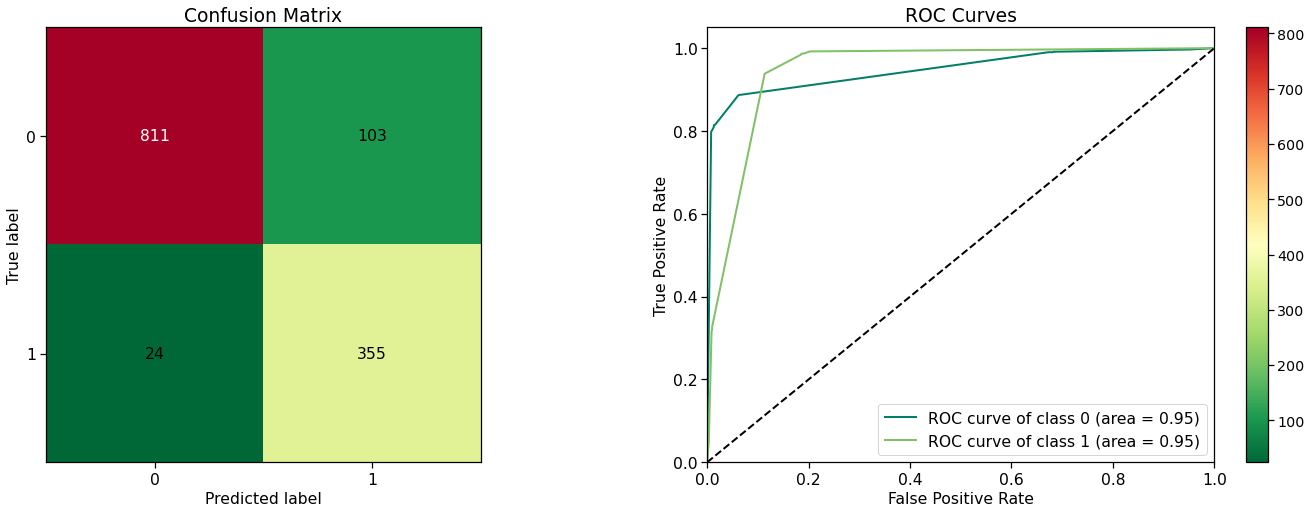

In [58]:
from sklearn.tree import DecisionTreeClassifier
spamCART = DecisionTreeClassifier(criterion = "entropy",random_state = 123,max_depth=10, min_samples_leaf=6)
  
# Performing training
spamCART.fit(X_train_cv, y_train)

# Prediction using gini
y_pred1 = spamCART.predict(X_test_cv)
y_prob1 = spamCART.predict_proba(X_test_cv)
from scikitplot.metrics import plot_confusion_matrix, plot_roc
fig, ax = plt.subplots(1, 2, figsize = (25,  8))
ax1 = plot_confusion_matrix(y_test, y_pred1, ax= ax[0], cmap= 'RdYlGn_r')
ax2 = plot_roc(y_test, y_prob1, ax= ax[1], plot_macro= False, plot_micro= False, cmap= 'summer')

Sklearn uses a default threshold of 0.5 for predictions.

What is the training set accuracy of spamCART, using a threshold of 0.5 for predictions?

>>The accuracy is 100% for training set in CART

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred))
print('Recall score: ', recall_score(y_test,y_pred))
print("F1 score: ",f1_score(y_test, y_pred))

Accuracy score:  0.9017788089713844
Precision score:  0.7751091703056768
Recall score:  0.9366754617414248
F1 score:  0.8482676224611709


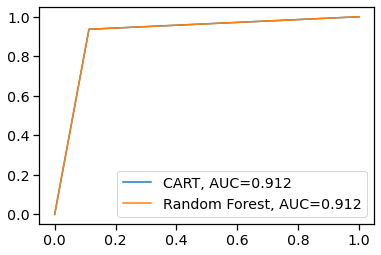

In [64]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = round(metrics.roc_auc_score(y_test,  y_pred), 4)
plt.plot(fpr,tpr,label="CART, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred1)
auc = round(metrics.roc_auc_score(y_test,  y_pred1), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

#add legend
plt.legend()

**Inferences:**

1. AUC score for CART is 0.912 and Random Forest is 0.912 in the above model

2. In the above dataset, the training accuracy is 100% for both models.

3. Data preprocessing is crucial as it helps to remove all the unecessary words and characters and convert it into a suitable form for the algorithm.